# **Testing the Emotion Detector model**

## Passo 1 - Importando as Bibliotecas

In [ ]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import zipfile

cv2.__version__


'4.8.0'

In [ ]:
%tensorflow_version 2.x
import tensorflow

tensorflow.__version__

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


'2.15.0'

In [ ]:
import tensorflow
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
tensorflow.__version__

'2.15.0'

## Connecting to Drive and accessing files

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/Implementing Artificial Intelligence for Emotion Detection/Projeto 2/Material.zip"
zip_object = zipfile.ZipFile(file=path, mode ="r")
zip_object.extractall('./')


path =
zip_object = zipfile.ZipFile(file = path, mode = "r")
zip_object.extractall('./')
zip_object.close

In [ ]:
path = "/content/Material/fer2013.zip"
zip_object = zipfile.ZipFile(file=path, mode="r")
zip_object.extractall("./")


## Acessing the database with photos of facial expressions

In [ ]:
data = pd.read_csv('/content/fer2013/fer2013.csv')
data.tail()

emotion                                             pixels        Usage
35882        6  50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...  PrivateTest
35883        3  178 174 172 173 181 188 191 194 196 199 200 20...  PrivateTest
35884        0  17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...  PrivateTest
35885        3  30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...  PrivateTest
35886        2  19 13 14 12 13 16 21 33 50 57 71 84 97 108 122...  PrivateTest

Text(0.5, 1.0, 'Imagens x emoções')

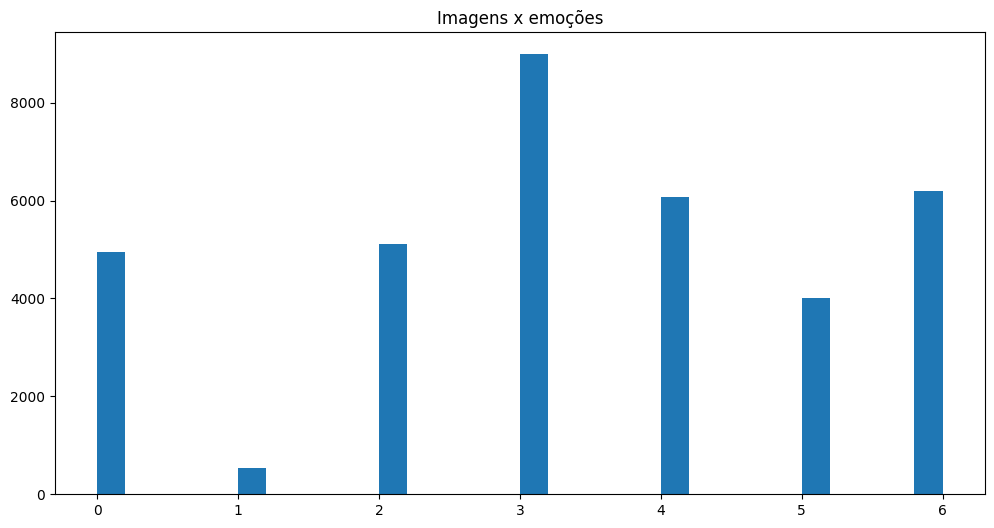

In [ ]:
plt.figure(figsize=(12,6))
plt.hist(data['emotion'], bins= 30)
plt.title('Imagens x emoções')

## Pre-processing

In [ ]:
pixels = data['pixels'].tolist()
pixels

['70 80 82 72 58 58 60 63 54 58 60 48 89 115 121 119 115 110 98 91 84 84 90 99 110 126 143 153 158 171 169 172 169 165 129 110 113 107 95 79 66 62 56 57 61 52 43 41 65 61 58 57 56 69 75 70 65 56 54 105 146 154 151 151 155 155 150 147 147 148 152 158 164 172 177 182 186 189 188 190 188 180 167 116 95 103 97 77 72 62 55 58 54 56 52 44 50 43 54 64 63 71 68 64 52 66 119 156 161 164 163 164 167 168 170 174 175 176 178 179 183 187 190 195 197 198 197 198 195 191 190 145 86 100 90 65 57 60 54 51 41 49 56 47 38 44 63 55 46 52 54 55 83 138 157 158 165 168 172 171 173 176 179 179 180 182 185 187 189 189 192 197 200 199 196 198 200 198 197 177 91 87 96 58 58 59 51 42 37 41 47 45 37 35 36 30 41 47 59 94 141 159 161 161 164 170 171 172 176 178 179 182 183 183 187 189 192 192 194 195 200 200 199 199 200 201 197 193 111 71 108 69 55 61 51 42 43 56 54 44 24 29 31 45 61 72 100 136 150 159 163 162 163 170 172 171 174 177 177 180 187 186 187 189 192 192 194 195 196 197 199 200 201 200 197 201 137 58 98 9

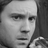

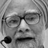

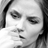

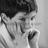

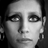

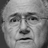

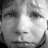

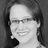

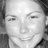

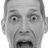

In [ ]:
largura, altura = 48, 48
faces = []
amostras = 0
for pixel_sequence in pixels:
  face = [int(pixel) for pixel in pixel_sequence.split(' ')]
  face = np.asarray(face).reshape(largura, altura)
  faces.append(face)
  if (amostras <10):
    cv2_imshow(face)
    amostras += 1

In [ ]:
print('Número total de imagens: ', str({len(faces)}))


Número total de imagens:  {35887}


In [ ]:
faces = np.asarray(faces)

In [ ]:
faces.shape

(35887, 48, 48)

In [ ]:
faces = np.expand_dims(faces, -1)
faces.shape

(35887, 48, 48, 1)

dat

In [ ]:
def normalizar(x):
  x= x.astype('float32')
  x= x / 255.0
  return x


In [ ]:
faces = normalizar(faces)

In [ ]:
faces[0]

array([[[0.27450982],
        [0.3137255 ],
        [0.32156864],
        ...,
        [0.20392157],
        [0.16862746],
        [0.16078432]],

       [[0.25490198],
        [0.23921569],
        [0.22745098],
        ...,
        [0.21960784],
        [0.20392157],
        [0.17254902]],

       [[0.19607843],
        [0.16862746],
        [0.21176471],
        ...,
        [0.19215687],
        [0.21960784],
        [0.18431373]],

       ...,

       [[0.35686275],
        [0.25490198],
        [0.16470589],
        ...,
        [0.28235295],
        [0.21960784],
        [0.16862746]],

       [[0.3019608 ],
        [0.32156864],
        [0.30980393],
        ...,
        [0.4117647 ],
        [0.27450982],
        [0.18039216]],

       [[0.3019608 ],
        [0.28235295],
        [0.32941177],
        ...,
        [0.41568628],
        [0.42745098],
        [0.32156864]]], dtype=float32)

In [ ]:
emocoes = pd.get_dummies(data['emotion']).values


In [ ]:
emocoes[0]

array([1, 0, 0, 0, 0, 0, 0], dtype=uint8)

## Importando Tensorflow/Keras

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model
from tensorflow.keras.models import model_from_json

## Dividindo em conjuntos para treinamento e validação

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(faces, emocoes, test_size = 0.1, random_state = 42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.1, random_state = 41)


In [ ]:
print('Número de imagens no conjunto de treinamento:', len(X_train))
print('Número de imagens no conjunto de teste:', len(X_test))
print('Número de imagens no conjunto de validação:', len(X_val))

Número de imagens no conjunto de treinamento: 29068
Número de imagens no conjunto de teste: 3589
Número de imagens no conjunto de validação: 3230


In [ ]:
np.save('mod_xtest', X_test)
np.save('mod_ytest', y_test)

## Modelo de Arquitetura (CNN)


 Os diferentes modelos de arquitetura são comparados entre si para determinar qual configuração produz os melhores resultados na tarefa de classificação de emoções.

### Modelo de Arquitetura 1

Padding same x valid: https://www.corvil.com/kb/what-is-the-difference-between-same-and-valid-padding-in-tf-nn-max-pool-of-tensorflow

Original implementation: https://medium.com/@birdortyedi_23820/deep-learning-lab-episode-3-fer2013-c38f2e052280

Regularizers: https://keras.io/regularizers/

Dropout: http://jmlr.org/papers/volume15/srivastava14a.old/srivastava14a.pdf

In [ ]:
num_features = 64
num_labels = 7
batch_size = 64
epochs = 100
width, height = 48, 48

model = Sequential()

model.add(Conv2D(num_features, kernel_size=(3,3), activation='relu',
                 input_shape=(width, height, 1), data_format = 'channels_last',
                 kernel_regularizer = l2(0.01)))
model.add(Conv2D(num_features, kernel_size=(3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(2*num_features, kernel_size=(3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(2*num_features, kernel_size=(3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(2*2*num_features, kernel_size=(3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(2*2*num_features, kernel_size=(3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(2*2*2*num_features, kernel_size=(3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(2*2*2*num_features, kernel_size=(3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(2*2*2*num_features, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(2*2*num_features, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(2*num_features, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(num_labels, activation = 'softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 46, 46, 64)        640       
                                                                 
 conv2d_9 (Conv2D)           (None, 46, 46, 64)        36928     
                                                                 
 batch_normalization_7 (Bat  (None, 46, 46, 64)        256       
 chNormalization)                                                
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 23, 23, 64)        0         
 g2D)                                                            
                                                                 
 dropout_7 (Dropout)         (None, 23, 23, 64)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 23, 23, 128)      

## Compilando o modelo

Parâmetros Adam: https://arxiv.org/abs/1412.6980

Artigo Adam: https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/

beta: Taxa de decaimento exponencial (por exemplo, 0.9)

In [ ]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = Adam(lr = 0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7),
              metrics = ['accuracy'])

arquivo_modelo = 'modelo_01_expressoes.h5'
arquivo_modelo_json = 'modelo_01_expressoes.json'

lr_reducer = ReduceLROnPlateau(monitor='val_loss', factor = 0.9, patience=3, verbose = 1)
early_stopper = EarlyStopping(monitor='val_loss', min_delta=0, patience = 8, verbose = 1, mode = 'auto')
checkpointer = ModelCheckpoint(arquivo_modelo, monitor='val_loss', verbose = 1, save_best_only=True)

### Salvando a arquitetura em um arquivo JSON

In [ ]:
model_json = model.to_json()
with open(arquivo_modelo_json, 'w') as json_file:
  json_file.write(model_json)


## Trainando o modelo

In [54]:
history = model.fit(np.array(X_train), np.array(y_train),
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                    validation_data = (np.array(X_val), np.array(y_val)),
                    shuffle=True,
                    callbacks=[lr_reducer, early_stopper, checkpointer])

Epoch 1/100
455/455 [==============================] - ETA: 0s - loss: 2.0044 - accuracy: 0.2114
Epoch 1: val_loss improved from inf to 1.83269, saving model to modelo_01_expressoes.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


455/455 [==============================] - 2262s 5s/step - loss: 2.0044 - accuracy: 0.2114 - val_loss: 1.8327 - val_accuracy: 0.2594 - lr: 0.0010
Epoch 2/100
455/455 [==============================] - ETA: 0s - loss: 1.8387 - accuracy: 0.2438
Epoch 2: val_loss improved from 1.83269 to 1.79597, saving model to modelo_01_expressoes.h5
455/455 [==============================] - 2231s 5s/step - loss: 1.8387 - accuracy: 0.2438 - val_loss: 1.7960 - val_accuracy: 0.2647 - lr: 0.0010
Epoch 3/100
455/455 [==============================] - ETA: 0s - loss: 1.8141 - accuracy: 0.2531
Epoch 3: val_loss improved from 1.79597 to 1.77371, saving model to modelo_01_expressoes.h5
455/455 [==============================] - 2234s 5s/step - loss: 1.8141 - accuracy: 0.2531 - val_loss: 1.7737 - val_accuracy: 0.2619 - lr: 0.0010
Epoch 4/100
455/455 [==============================] - ETA: 0s - loss: 1.7367 - accuracy: 0.3005
Epoch 4: val_loss improved from 1.77371 to 1.66679, saving model to modelo_01_expressoe

KeyboardInterrupt: 

In [ ]:
print(history.history)

## Gerando gráfico de melhoria em cada etapa do treinamento

In [ ]:
import matplotlib.pyplot as plt

def plota_historico_modelo(historico_modelo):
    fig, axs = plt.subplots(1, 1, figsize=(15,5))  # alteração aqui
    axs.plot(range(1, len(historico_modelo.history['accuracy']) + 1), historico_modelo.history['accuracy'], 'r')
    axs.plot(range(1, len(historico_modelo.history['val_accuracy']) + 1), historico_modelo.history['val_accuracy'], 'b')
    axs.set_title('Model accuracy')
    axs.set_ylabel('Accuracy')
    axs.set_xlabel('Epoch')
    plt.show()

plota_historico_modelo(history)

## Verificando a precisão do modelo

In [ ]:
scores = model.evaluate(np.array(X_test), np.array(y_test), batch_size = batch_size)
scores

In [ ]:
scores

In [ ]:
print('Acurácia: ' + str(scores[1]))
print('Erro: ' + str(scores[0]))

## Carregando dados para gerar a matriz de confusão

 A matriz de confusão é uma ferramenta de avaliação de desempenho de um modelo de classificação que mostra a frequência com que as classes reais são classificadas corretamente ou incorretamente pelo modelo. Portanto, esse processo envolve carregar os dados necessários para calcular e visualizar essa matriz de avaliação do modelo

In [ ]:
true_y = []
pred_y = []
x = np.load('mod_xtest.npy')
y = np.load('mod_ytest.npy')

In [ ]:
x[0]

In [ ]:
y[0]

In [ ]:
json_file = open(arquivo_modelo_json, 'r')
loaded_model_json = json_file.read()
json_file.close()

In [ ]:
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights(arquivo_modelo)

In [ ]:
y_pred = loaded_model.predict(x)

In [ ]:
yp = y_pred.tolist()
yt = y.tolist()
count = 0

In [ ]:
len(y)

In [ ]:
for i in range(len(y)):
  yy = max(yp[i])
  yyt = max(yt[i])
  pred_y.append(yp[i].index(yy))
  true_y.append(yt[i].index(yyt))
  if (yp[i].index(yy) == yt[i].index(yyt)):
    count += 1

acc = (count / len(y)) * 100

In [ ]:
print('Acurácia no conjunto de teste: ' + str(acc))

In [ ]:
np.save('truey_mod01', true_y)
np.save('predy_mod01', pred_y)

## Gerando a Matriz de Confusão

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
y_true = np.load('truey_mod01.npy')
y_pred = np.load('predy_mod01.npy')

In [ ]:
cm = confusion_matrix(y_true, y_pred)
expressoes = ['Anger', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprised', 'Neutral']
titulo = 'Confusion Matrix'
print(cm)


In [ ]:
import itertools
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title(titulo)
plt.colorbar()
tick_marks = np.arange(len(expressoes))
plt.xticks(tick_marks, expressoes, rotation = 45)
plt.yticks(tick_marks, expressoes)
fmt = 'd'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, format(cm[i, j], fmt), horizontalalignment='center', color='white' if cm[i,j] > thresh else 'black')

plt.ylabel('Classificação correta')
plt.xlabel('Predição')
plt.savefig('matriz_confusao_mod01.png')

## Testando imagem

In [ ]:
imagem = cv2.imread('Material/testes/teste02.jpg')
cv2_imshow(imagem)

In [ ]:
original = imagem.copy()
gray = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

In [ ]:
face_cascade = cv2.CascadeClassifier('Material/haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(gray, 1.1, 3)

In [ ]:
for (x, y, w, h) in faces:
  cv2.rectangle(original, (x, y), (x + w, y + h), (0, 255, 0), 1)
  roi_gray = gray[y:y + h, x:x + w]
  roi_gray = roi_gray.astype('float') / 255.0
  cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray, (48, 48)), -1), 0)
  prediction = loaded_model.predict(cropped_img)[0]
  cv2.putText(original, expressoes[int(np.argmax(prediction))], (x, y - 10),
              cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2, cv2.LINE_AA)

cv2_imshow(original)

